In [ ]:
# Data source:
    # https://data.cnra.ca.gov/dataset/water-quality-data/resource/8ff3a841-d843-405a-a360-30c740cc8691

In [1]:
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
from pprint import pprint
import openweathermapy.core as owm
import seaborn as sns
import numpy as np

In [33]:
# Import the data (would have rather used the API, but the csv will do for now)
data = "data/lab-results.csv"
df = pd.read_csv(data)

print(df.shape) # yikes! --> (4278088, 17)
df.head()

# We need to filter this huge dataset, perhaps by selecting sample measurements from 2000 onward.

(4278088, 17)


,STATION_ID,STATION_NAME,FULL_STATION_NAME,STATION_NUMBER,STATION_TYPE,LATITUDE,LONGITUDE,COUNTY_NAME,SAMPLE_CODE,SAMPLE_DATE,SAMPLE_DEPTH,SAMPLE_DEPTH_UNITS,PARAMETER,RESULT,REPORTING_LIMIT,UNITS,METHOD_NAME
0,8135,01S04E32C001M,01S04E32C001M,01S04E32C001M,Groundwater,37.8073,-121.562,Alameda,WDIS_0719152,05/03/1967 09:00,NaN,Feet,Conductance,3480.0,1.0,uS/cm,EPA 120.1
1,8135,01S04E32C001M,01S04E32C001M,01S04E32C001M,Groundwater,37.8073,-121.562,Alameda,WDIS_0719152,05/03/1967 09:00,NaN,Feet,Dissolved Boron,7.7,0.1,mg/L,"Std Method 4500-B, C"
2,8135,01S04E32C001M,01S04E32C001M,01S04E32C001M,Groundwater,37.8073,-121.562,Alameda,WDIS_0719152,05/03/1967 09:00,NaN,Feet,Dissolved Calcium,68.0,1.0,mg/L,EPA 215.2
3,8135,01S04E32C001M,01S04E32C001M,01S04E32C001M,Groundwater,37.8073,-121.562,Alameda,WDIS_0719152,05/03/1967 09:00,NaN,Feet,Dissolved Chloride,758.0,0.1,mg/L,"Std Method 4500-Cl, B"
4,8135,01S04E32C001M,01S04E32C001M,01S04E32C001M,Groundwater,37.8073,-121.562,Alameda,WDIS_0719152,05/03/1967 09:00,NaN,Feet,Dissolved Magnesium,59.0,0.1,mg/L,"Std Method 3500-Mg, E"


In [34]:
# I want to categorize my data by years; I need to splice the data field
df["sampleYear"] = pd.DatetimeIndex(df['SAMPLE_DATE']).year

In [35]:
df = df[(df['sampleYear'] > 1999) & (df['sampleYear'] <= 2018)]
print(df.shape) # OK...somewhat better --> (822011, 18)
print(df.columns) 

(874334, 18)
Index(['STATION_ID', 'STATION_NAME', 'FULL_STATION_NAME', 'STATION_NUMBER',
       'STATION_TYPE', 'LATITUDE', 'LONGITUDE', 'COUNTY_NAME', 'SAMPLE_CODE',
       'SAMPLE_DATE', 'SAMPLE_DEPTH', 'SAMPLE_DEPTH_UNITS', 'PARAMETER',
       'RESULT', 'REPORTING_LIMIT', 'UNITS', 'METHOD_NAME', 'sampleYear'],
      dtype='object')


In [37]:
# Re-export filter dataset to a different csv
df.to_csv("data/lab-results_filter00-18.csv",index=False)

In [77]:
data = "data/lab-results_filter00-18.csv"
df = pd.read_csv(data)
df = df.drop(['STATION_NAME','STATION_NUMBER'],
                        axis=1)
df.head()

,STATION_ID,FULL_STATION_NAME,STATION_TYPE,LATITUDE,LONGITUDE,COUNTY_NAME,SAMPLE_CODE,SAMPLE_DATE,SAMPLE_DEPTH,SAMPLE_DEPTH_UNITS,PARAMETER,RESULT,REPORTING_LIMIT,UNITS,METHOD_NAME,sampleYear
0,46213,West bank drain inlet of upstream of SBPP,Surface Water,37.7692,-121.619,Alameda,DA0105B0016,01/25/2005 07:40,0.5,Feet,Dissolved Aluminum,0.000,0.010,mg/L,EPA 200.8 (D),2005
1,46213,West bank drain inlet of upstream of SBPP,Surface Water,37.7692,-121.619,Alameda,DA0105B0016,01/25/2005 07:40,0.5,Feet,Dissolved Ammonia,0.050,0.010,mg/L as N,EPA 350.1,2005
2,46213,West bank drain inlet of upstream of SBPP,Surface Water,37.7692,-121.619,Alameda,DA0105B0016,01/25/2005 07:40,0.5,Feet,Dissolved Antimony,0.000,0.001,mg/L,EPA 200.8 (D),2005
3,46213,West bank drain inlet of upstream of SBPP,Surface Water,37.7692,-121.619,Alameda,DA0105B0016,01/25/2005 07:40,0.5,Feet,Dissolved Arsenic,0.003,0.001,mg/L,EPA 200.8 (D),2005
4,46213,West bank drain inlet of upstream of SBPP,Surface Water,37.7692,-121.619,Alameda,DA0105B0016,01/25/2005 07:40,0.5,Feet,Dissolved Barium,0.098,0.050,mg/L,EPA 200.8 (D),2005


In [35]:
print('-------------------Filter Data Summary---------------------')
print('**********************************************************************')
print('--------------------Sample Size per Year, 2000-2018---------------------')
print(df.groupby('sampleYear').size())
print('')
print('----------------Count of Parameters measurements--------------------')
print(pd.value_counts(df['PARAMETER'].values, sort=True))

-------------------Filter Data Summary---------------------
**********************************************************************
--------------------Sample Size per Year, 2000-2018---------------------
sampleYear
2000    52323
2001    61553
2002    44572
2003    71396
2004    69077
2005    59710
2006    66716
2007    61033
2008    41868
2009    41151
2010    39286
2011    43660
2012    41479
2013    31578
2014    34889
2015    36559
2016    36421
2017    32893
2018     8170
dtype: int64

----------------Count of Parameters measurements--------------------
Dissolved Chloride               20759
Total Dissolved Solids           19274
Dissolved Sulfate                18733
Dissolved Ammonia                18620
Dissolved Calcium                18352
Dissolved Magnesium              18209
Dissolved Sodium                 18095
Dissolved Boron                  18079
Dissolved Hardness               18009
Dissolved Ortho-phosphate        17704
Dissolved Nitrate + Nitrite      17582
pH     

max: 12.0
max: 4.8


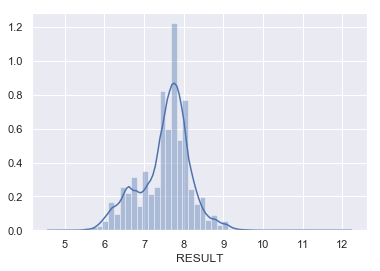

In [78]:
# pH 
    # https://water.usgs.gov/edu/ph.html

pH_lv = df[df['PARAMETER'] == 'pH']
pH_lv['RESULT'].max()

pH = pH_lv['RESULT'].dropna()

pH = pH[pH != 206.0]
pH = pH[pH != 96.6]
pH = pH[pH != 21.9]

print("max: " + str(pH.max()))
print("max: " + str(pH.min()))

sns.set(color_codes=True)
sns.distplot(pH);

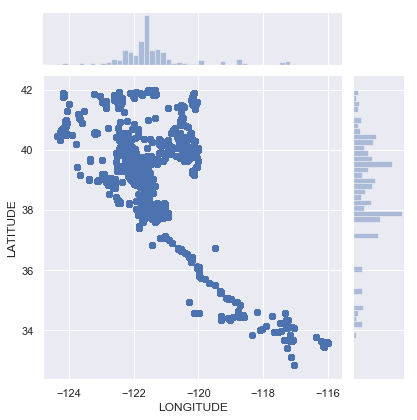

In [37]:
X = df[['LATITUDE', 'LONGITUDE']].values
sns.jointplot(x="LONGITUDE", y="LATITUDE", data=df);

In [31]:
df['PARAMETER'].unique()

array(['Dissolved Aluminum', 'Dissolved Ammonia', 'Dissolved Antimony',
       'Dissolved Arsenic', 'Dissolved Barium', 'Dissolved Beryllium',
       'Dissolved Boron', 'Dissolved Bromide', 'Dissolved Cadmium',
       'Dissolved Calcium', 'Dissolved Chloride', 'Dissolved Chromium',
       'Dissolved Copper', 'Dissolved Fluoride', 'Dissolved Hardness',
       'Dissolved Iron', 'Dissolved Lead', 'Dissolved Magnesium',
       'Dissolved Manganese', 'Dissolved Mercury', 'Dissolved Nickel',
       'Dissolved Nitrate', 'Dissolved Nitrate + Nitrite',
       'Dissolved Ortho-phosphate', 'Dissolved Selenium',
       'Dissolved Silver', 'Dissolved Sodium', 'Dissolved Sulfate',
       'Dissolved Zinc', 'Specific Conductance', 'Total Alkalinity',
       'Total Dissolved Solids', 'Total Kjeldahl Nitrogen',
       'Total Phosphorus', 'pH', '1,1,1,2-Tetrachloroethane',
       '1,1,1-Trichloroethane', '1,1,2,2-Tetrachloroethane',
       '1,1,2-Trichloroethane', '1,1-Dichloroethane',
       '1,1-Dichlo

PMCLs

In [79]:
AL = df[df['PARAMETER'] == 'Total Aluminum']
AL['RESULT'].max() # --> 20525 .... ug/L ! 
AL['UNITS'].unique() # --> ['mg/L', 'ug/L']
# I have measurements in both mg/L & ug/L, units need to be normalized.

array(['mg/L', 'ug/L'], dtype=object)

In [80]:
# Convert ug/L to mg/L
AL['convert'] = np.where(AL['UNITS'] == 'ug/L', AL['RESULT'] / 1000, AL['RESULT'])

C:\Users\White Base\AppData\Local\conda\conda\envs\FinalProject\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


max: 20.525
max: 0.0


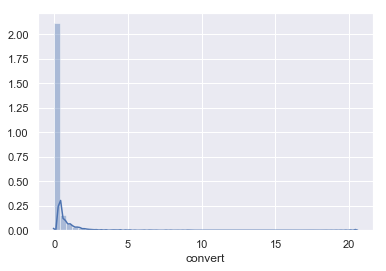

In [81]:
print("max: " + str(AL['convert'].max()))
print("max: " + str(AL['convert'].min()))

AL = AL['convert'].dropna()

sns.set(color_codes=True)
sns.distplot(AL); # Need to bin outlier values

In [82]:
import numpy as np
import pandas as pd
import matplotlib
# https://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-19.html

In [84]:
print("max: " + str(AL.max()))
print("max: " + str(AL.min()))

max: 20.525
max: 0.0


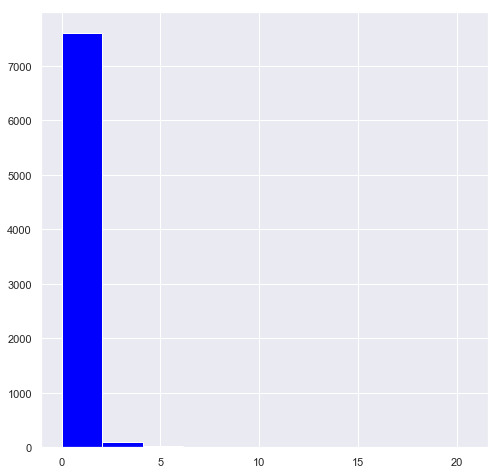

In [86]:
AL.hist(figsize=(8,8),         # Plot size
        color="blue") # Again, we have a single outlier value skewing the histogram

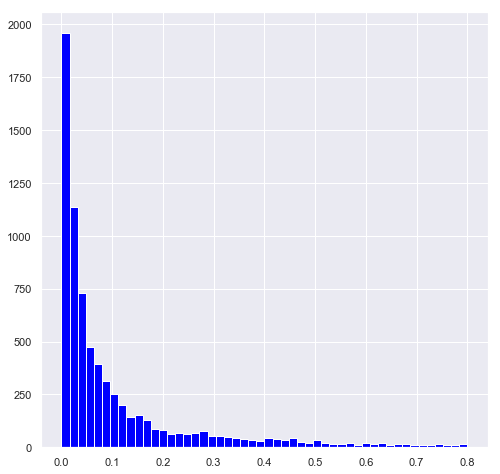

In [89]:
AL.hist(        
              figsize=(8,8),         # Plot size
              color="blue",          # Plot color
              bins=50,               # Use 50 bins
              range= (0,.8))        # Limit x-axis range

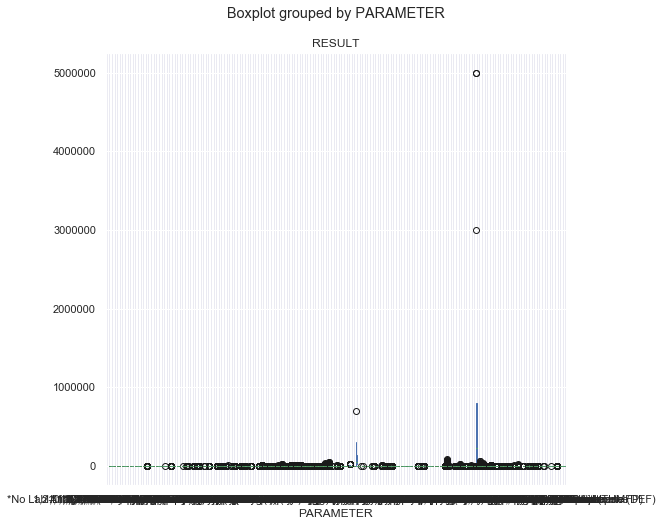

In [92]:
df.boxplot(column="RESULT",        # Column to plot
                 by= "PARAMETER",         # Column to split upon
                 figsize= (8,8))  

In [ ]:
#######################################################################################################################

In [2]:
data = "data/lab-results_filter00-18.csv"
df = pd.read_csv(data)
df = df.drop(['STATION_NAME','STATION_NUMBER'],
                        axis=1)
df.head()

,STATION_ID,FULL_STATION_NAME,STATION_TYPE,LATITUDE,LONGITUDE,COUNTY_NAME,SAMPLE_CODE,SAMPLE_DATE,SAMPLE_DEPTH,SAMPLE_DEPTH_UNITS,PARAMETER,RESULT,REPORTING_LIMIT,UNITS,METHOD_NAME,sampleYear
0,46213,West bank drain inlet of upstream of SBPP,Surface Water,37.7692,-121.619,Alameda,DA0105B0016,01/25/2005 07:40,0.5,Feet,Dissolved Aluminum,0.000,0.010,mg/L,EPA 200.8 (D),2005
1,46213,West bank drain inlet of upstream of SBPP,Surface Water,37.7692,-121.619,Alameda,DA0105B0016,01/25/2005 07:40,0.5,Feet,Dissolved Ammonia,0.050,0.010,mg/L as N,EPA 350.1,2005
2,46213,West bank drain inlet of upstream of SBPP,Surface Water,37.7692,-121.619,Alameda,DA0105B0016,01/25/2005 07:40,0.5,Feet,Dissolved Antimony,0.000,0.001,mg/L,EPA 200.8 (D),2005
3,46213,West bank drain inlet of upstream of SBPP,Surface Water,37.7692,-121.619,Alameda,DA0105B0016,01/25/2005 07:40,0.5,Feet,Dissolved Arsenic,0.003,0.001,mg/L,EPA 200.8 (D),2005
4,46213,West bank drain inlet of upstream of SBPP,Surface Water,37.7692,-121.619,Alameda,DA0105B0016,01/25/2005 07:40,0.5,Feet,Dissolved Barium,0.098,0.050,mg/L,EPA 200.8 (D),2005


In [9]:
# https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas

In [6]:
PMCLs = df.loc[(df['PARAMETER'] == 'Total Arsenic') | (df['PARAMETER'] == 'Total Mercury') | (df['PARAMETER'] == 'Dissolved Nitrate') | (df['PARAMETER'] == 'Total Lead') | (df['PARAMETER'] == 'Total Selenium')]


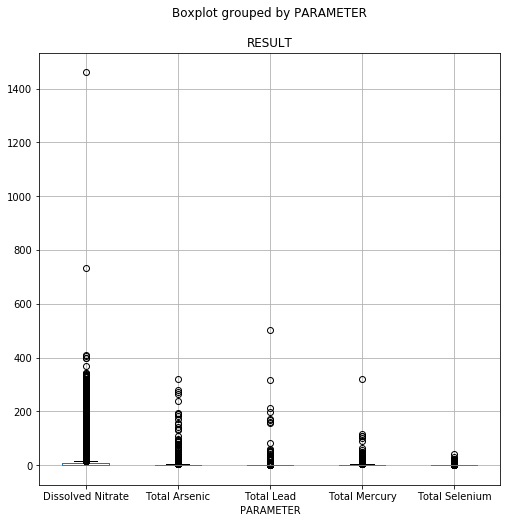

In [8]:
PMCLs.boxplot(column="RESULT",        # Column to plot
                 by= "PARAMETER",         # Column to split upon
                 figsize= (8,8))  